In [1]:
import numpy as np

from astropy.io import fits
from astropy.utils.data import download_file

from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
# Uncomment the following line if you have a mac with retina display
%config InlineBackend.figure_format='retina'

In [3]:
# Set font size for labels and axes ticks (http://matplotlib.org/users/customizing.html)
from matplotlib import rc
rc('font', size=12)
rc('axes', titlesize=14)
rc('axes', labelsize=14)

In [4]:
# generate some data
x = np.arange(0, 5, 0.1)
y = np.sin(x)
print ('x =', x)
print ()
print ('y =', y)

('x =', array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9]))
()
('y =', array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.951602

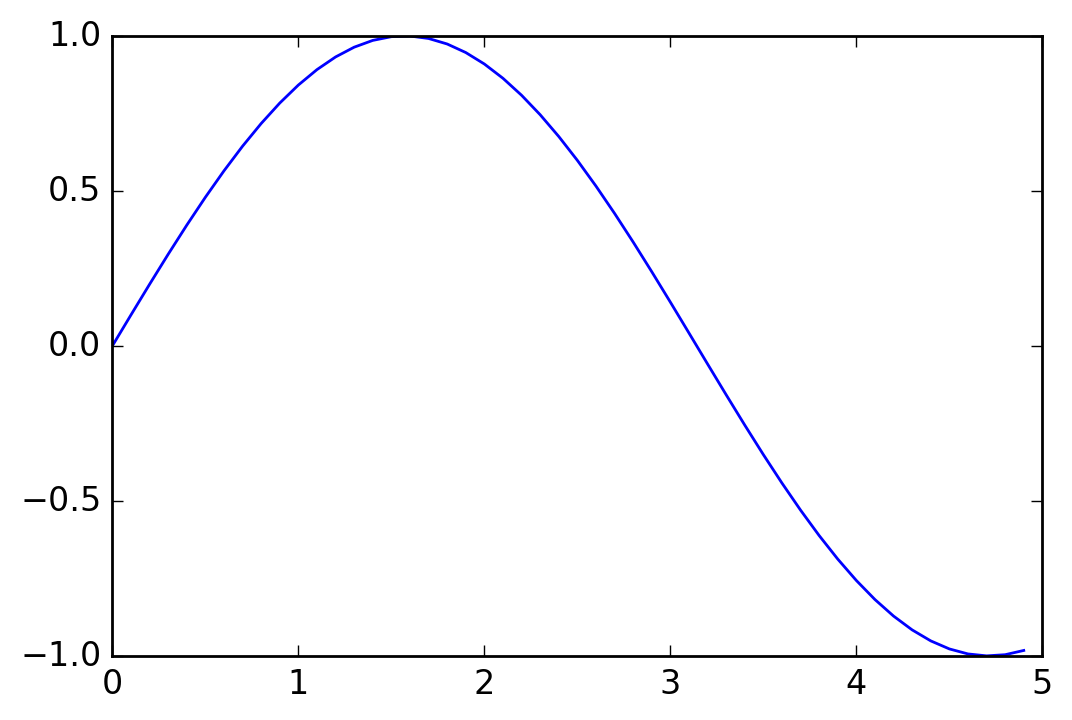

In [5]:
plt.plot(x, y)

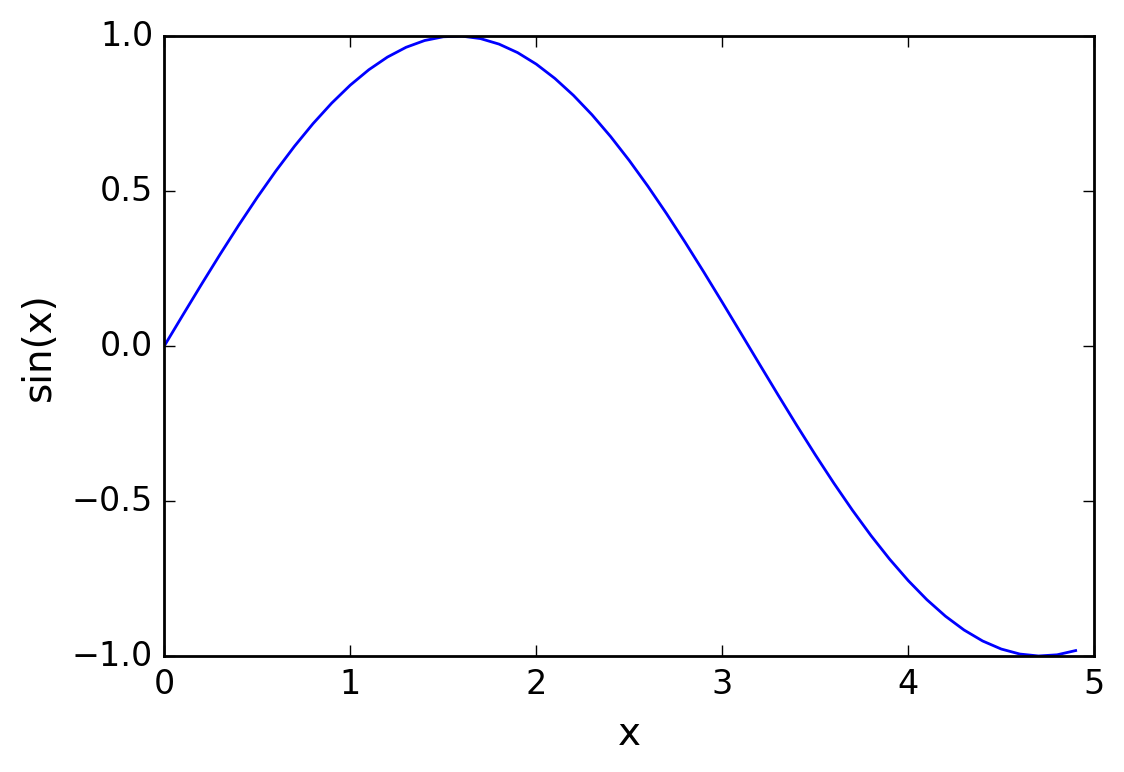

In [6]:

plt.plot(x, y) 
plt.xlabel('x')
plt.ylabel('sin(x)')

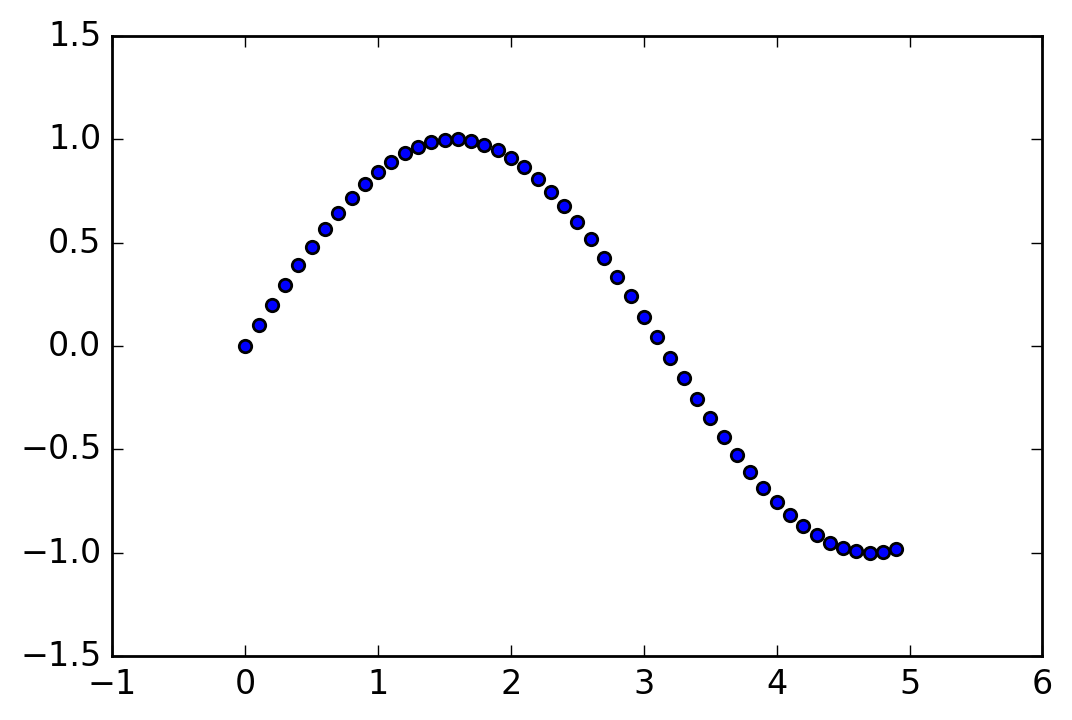

In [7]:
plt.scatter(x,y)

('min:', 3759, 'max:', 22918)


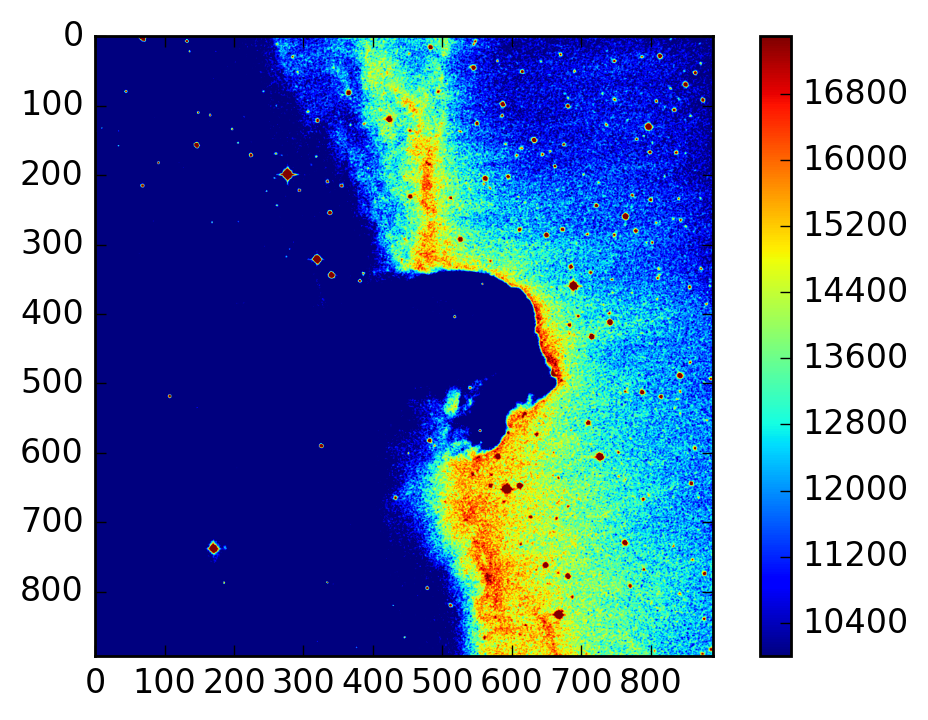

In [25]:
#images
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', 
                           cache=True)

image_data = fits.getdata(image_file)
print ("min:", image_data.min(), 
       "max:", image_data.max())

plt.imshow(image_data,vmax=10000, vmin=17500)
plt.colorbar()
plt.show()

In [38]:
from astropy.wcs import wcs

image = fits.open(image_file)
header = image[0].header
data = image[0].data
wcs = WCS(header)

fig = plt.figure()
fig.add_subplot(111,projection=wcs)
plt.imshow(data)
plt.xlabel(header['CTYPE1'])
plt.xlabel(header['CTYPE2'])
plt.imshow(image_data)
plt.show()

ImportError: Using WCS instances as Matplotlib projections requires the WCSAxes package to be installed. See http://wcsaxes.readthedocs.io for more details.

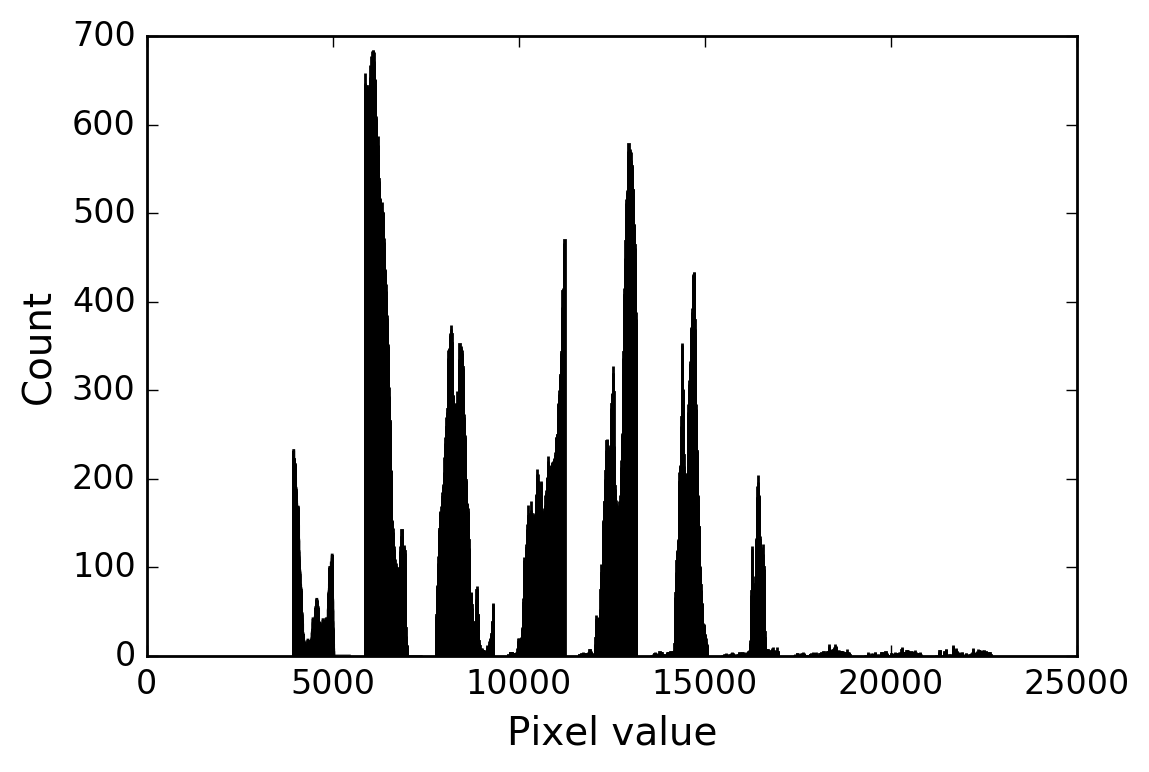

In [39]:
histogram = plt.hist(image_data)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.show()

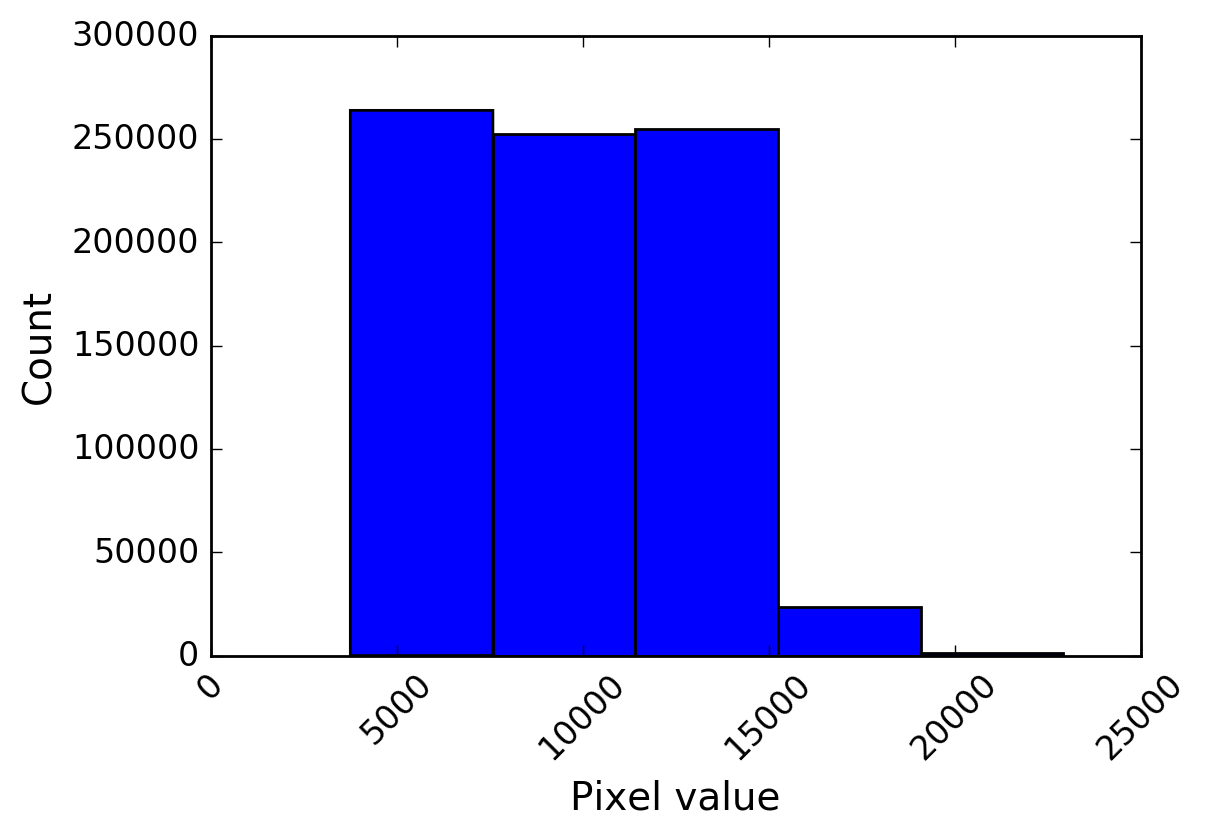

In [42]:
nbins = 5
histogram = plt.hist(image_data.flat[:], nbins)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

ImportError: Using WCS instances as Matplotlib projections requires the WCSAxes package to be installed. See http://wcsaxes.readthedocs.io for more details.

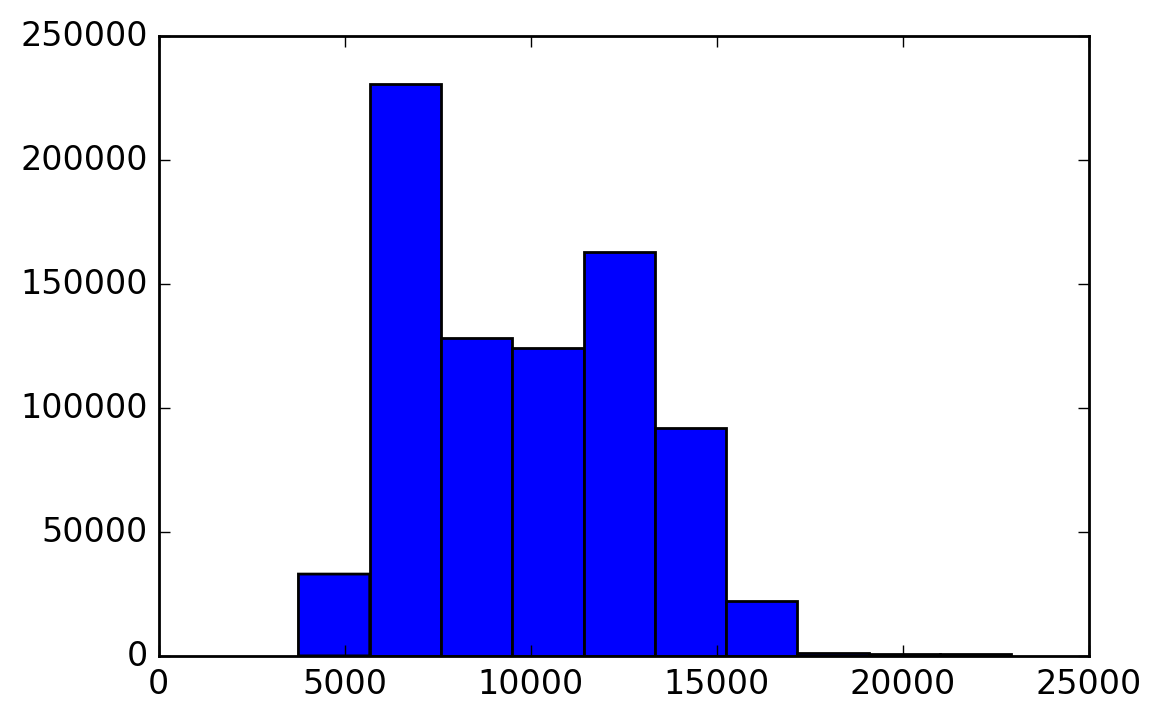

In [44]:
nbins= 10
histogram = plt.hist(image_data.flat[:], nbins)
min = np.floor(np.min(data))
max = np.floor(np.max(data))
bounds= [val for val in np.arange(min, max+1, (max-min)/nbins)]
bounds

#this next part was from the instructor; doesn't work here
fig=plt.figure()
fig.add_subplot(111,projection=wcs)
cmap= plt.cm.YlGnBu
image=plt.imshow(data,cmap=cmap)

cbar=plt.colorbar(image,cmap=cmap,ticks=bounds,boundaries=bounds)

cbar.set_label('pixel val', fontsize=14)

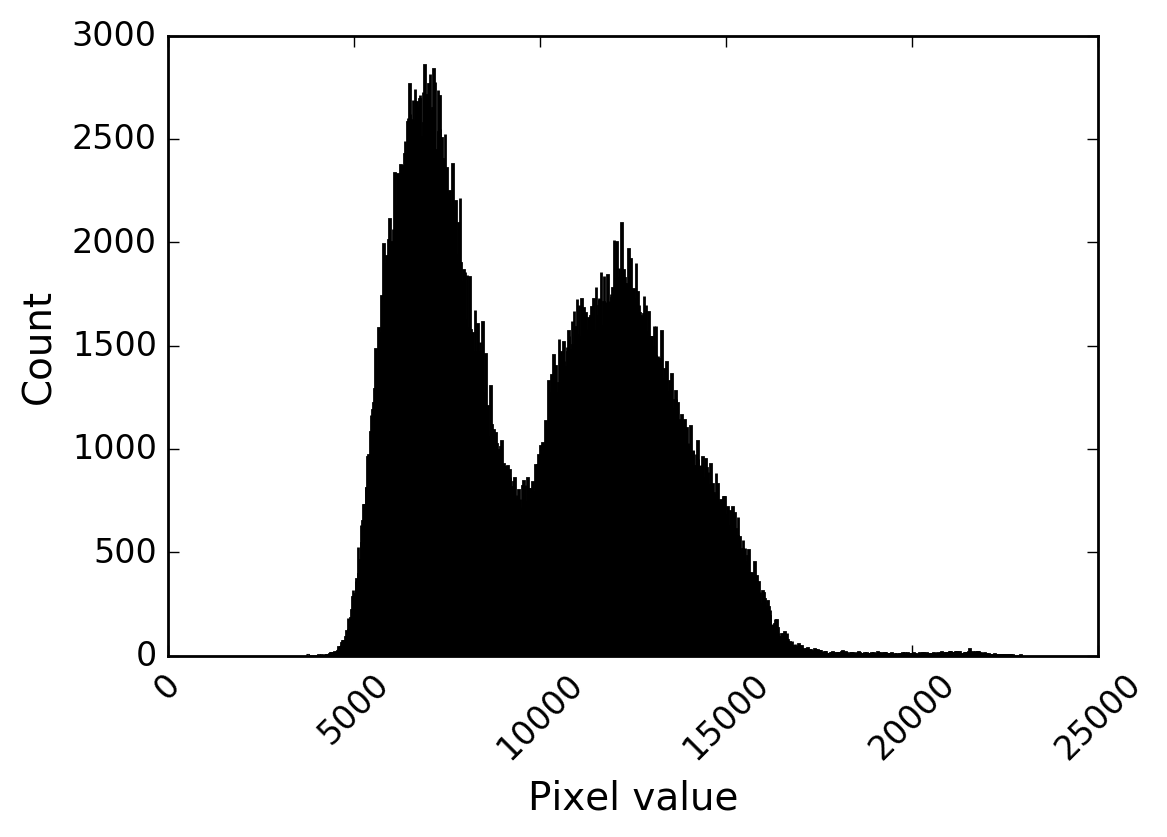

In [46]:
nbins = 1000
histogram = plt.hist(image_data.flat[:], nbins)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()


In [47]:
#Ex 7
import csv
filename = 'data/ratio.csv'
# note: https://github.com/macrocosme/macrocosme.github.io/blob/master/python-viz/Data%20visualisation%20with%20Python.ipynb

SyntaxError: invalid syntax (<ipython-input-47-e5977a06bb2a>, line 4)

In [48]:
#to make bar graphs with boxes
from pandas import read_csv
#four axes, returned as a 2-d array
f, axarr - plt.subplots(2, 2, sharex=True, sharey=True)
 
x=0
y=0

#fine tune sigure, hide some tick marks


axarr[1,0].set_ylabel('Ratio(:1)')



NameError: name 'f' is not defined

In [54]:
#ex 10a
cube=fits.open('/data/data_visualization/NGC_2903_RO_CUBE_THINGS.FITS')[0]
cube.header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 /                                                
NAXIS   =                    4 /                                                
NAXIS1  =                 1024 /                                                
NAXIS2  =                 1024 /                                                
NAXIS3  =                   87 /                                                
NAXIS4  =                    1 /                                                
EXTEND  =                    T /Tables following main image                     
BLOCKED =                    T /Tape may be blocked                             
OBJECT  = 'NGC2903 '           /Source name                                     
TELESCOP= 'VLA     '           /                                                
INSTRUME= 'VLA     '           /                                                
OBSERVER= 'AW605   '        

In [ ]:
#10b
f, axarr = plt.subplots()
axarr.plot(cube.data[0,:512,:])